# Introduction to NLP Fundamentals in TensorFlow

## Check for GPU

In [1]:
!nvidia-smi -L


/bin/bash: line 1: nvidia-smi: command not found


## Get helper functions

In [2]:
!wget https://raw.githubusercontent.com/yacin-hamdi/deep_learning/master/tensorflow/helper_functions.py

--2024-02-15 17:42:01--  https://raw.githubusercontent.com/yacin-hamdi/deep_learning/master/tensorflow/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-02-15 17:42:01 (49.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import *

## Get a text dataset

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2024-02-15 17:42:13--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.192.207, 209.85.145.207, 172.217.219.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.192.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.01s   

2024-02-15 17:42:13 (43.3 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [5]:
unzip_data("nlp_getting_started.zip")

## Visualizing a text dataset

In [6]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [7]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
# shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [9]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [10]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [11]:
# total number of samples
len(train_df), len(test_df)

(7613, 3263)

In [12]:
# visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f'target:{target}', "(real disaster)" if target > 0 else "(not real disater)")
  print(f'test:\n{text}')
  print("----\n")

target:0 (not real disater)
test:
burned 202 calories doing 30 minutes of Walking 4.0 mph very brisk pace #myfitnesspal
----

target:0 (not real disater)
test:
Couples having less sex... for fear it'll be a let down: Internet movies and books saying how sex 'ought to be' pÛ_ http://t.co/c1xhIzPrAd
----

target:1 (real disaster)
test:
VICTORINOX SWISS ARMY DATE WOMEN'S RUBBER MOP WATCH 241487 http://t.co/yFy3nkkcoH http://t.co/KNEhVvOHVK
----

target:0 (not real disater)
test:
What. The. Fuck. https://t.co/Nv7rK63Pgc
----

target:1 (real disaster)
test:
#LoMasVisto THOUSANDS OF HIPSTERS FEARED LOST: Giant Sinkhole Devours Brooklyn Intersectio... http://t.co/qwtk1b2fMC #CadenaDeSeguidores
----



### Split data into training and validation sets

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                            train_df_shuffled['target'].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=32)

In [15]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [16]:
# Chekc the first 10 samples
train_sentences[:10], train_labels[:10]

(array(['#LOL Plymouth (\x89Û÷Let\x89Ûªs Obliterate Litter\x89Ûª) http://t.co/GDrssjbH8q',
        'AND MY FAM HAD TO EVACUATE BC WE NEED POWER',
        'MH370: Aircraft debris found on La Reunion is from missing Malaysia Airlines ... - ABC Onlin... http://t.co/N3lNdJKYo3 G #Malaysia #News',
        '\x89Û÷Good Samaritans\x89Ûª shot in horror hijacking http://t.co/V5yUUALoqw #263Chat #Twimbos ZimpapersViews',
        "#FOXDebateQuestions:  To what degree has Obama's efforts to institute Sharia Law exacerbated the California wild fires?",
        "Looks like a war zone outside. What's going on?",
        '#hot  Funtenna: hijacking computers to send data as sound waves [Black Hat 2015] http://t.co/8JcYXhq1AZ #prebreak #best',
        "Doing Giveaway Music Kit Dren Death's Head Demolition: http://t.co/fHKhCqPl7j",
        'BBC News - India rail crash: Trains derail in Madhya Pradesh flash flood http://t.co/fU1Btuq1Et',
        "'Gunman who opened fire at Tennessee movie theater killed by

## Converting text into number

 ### Text Vectorization

In [17]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [18]:
text_vectorizer = TextVectorization(max_tokens=1000,
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None,
                                    output_mode='int',
                                    output_sequence_length=None,
                                    pad_to_max_tokens=True)

In [19]:
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [20]:
max_vocab_length = 10000
max_length = 15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode='int',
                                    output_sequence_length=max_length)

In [21]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [22]:
# Create a sample sentence and tokenize it
sample_sentence = "there's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[266,   3, 208,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [23]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f'original text:\n{random_sentence}\
        \n\nVectorized version:')
text_vectorizer([random_sentence])

original text:
Investigators rule catastrophic structural failure resulted in 2014 ... http://t.co/AdZ8kbuRt7        

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 374, 1467,  474,  322,  292, 2741,    4, 1321,    1,    0,    0,
           0,    0,    0,    0]])>

In [24]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()

In [25]:
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
top_5_words, bottom_5_words

(['', '[UNK]', 'the', 'a', 'in'],
 ['pantofel', 'panties', 'panther', 'pantalonesfuego', 'panoramic'])

### Creating an Embedding using an Embedding Layer

In [26]:
import tensorflow as tf

embedding = tf.keras.layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             input_length=max_length)

embedding

In [27]:
random_sentence = random.choice(train_sentences)
print(f'original text:\n {random_sentence}\
      \n\nEmbedding version:')
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

original text:
 I wrecked my stomach help      

Embedding version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.02024118,  0.04616902, -0.00792233, ..., -0.00378352,
         -0.03145976, -0.02303474],
        [-0.04902537, -0.03758838, -0.02044883, ...,  0.03002152,
         -0.0069073 ,  0.00654465],
        [ 0.02715576,  0.01901047, -0.00984282, ...,  0.00765862,
          0.01677111,  0.04241909],
        ...,
        [-0.02912809,  0.01915756, -0.01527636, ..., -0.02441442,
         -0.02502087,  0.00272291],
        [-0.02912809,  0.01915756, -0.01527636, ..., -0.02441442,
         -0.02502087,  0.00272291],
        [-0.02912809,  0.01915756, -0.01527636, ..., -0.02441442,
         -0.02502087,  0.00272291]]], dtype=float32)>

In [28]:
sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.02024118,  0.04616902, -0.00792233, -0.00806646,  0.01246443,
        -0.03698676, -0.04364445,  0.03117001, -0.00531751,  0.000797  ,
         0.02305287,  0.03025843,  0.04983357, -0.01642214,  0.01058687,
         0.0004016 , -0.00590272,  0.04993553,  0.03109411, -0.04219223,
        -0.01045681, -0.01686286, -0.03305407,  0.04964981,  0.0180046 ,
         0.00344638,  0.04512224,  0.00065733,  0.00660055,  0.01835204,
         0.0445102 , -0.00608138,  0.01253736, -0.01023017,  0.00383391,
         0.00017027, -0.00840691, -0.02919647,  0.00954006,  0.00900997,
         0.03751532, -0.02876253,  0.00112005, -0.03184197,  0.03920839,
         0.02637705,  0.03731424,  0.01156859, -0.02581207,  0.00631814,
        -0.04865498, -0.0066518 , -0.02566712,  0.04685482,  0.0039367 ,
        -0.03992436,  0.00359543, -0.02596711,  0.01815449,  0.0014716 ,
         0.02431295,  0.00274799,  0.02777359,  0.0168814 , -0.04532571,
  

## Modelling a text dataset

* Model 0: Naive Bayes (baseline)
* Model 1: feed-forward neural network (dense model)
* Model 2: LSTM model(RNN)
* Model 3: GRU model(RNN)
* Model 4: bidirectional-LSTM model(RNN)
* Model 5: 1D Convolutional Neural Network (CNN)
* Model 6: Tensorflow Hub Pretrained Feature Extrator
* Model 7: Same as model 6 with 10% of training data

### Model 0: baseline

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ('clf', MultinomialNB())
])

# Fit the pipline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [30]:
# Evaluate our baseline model
baseline_score = model_0.score(val_sentences, val_labels)
print(f'our baseline model achieves an accuracy of:{baseline_score*100:.2f}%')

our baseline model achieves an accuracy of:79.53%


In [31]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [32]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1])

### evaluation function

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluations(y_true, y_pred):
  eval = {}
  eval['accuracy'] = accuracy_score(y_true, y_pred) * 100
  eval['precision'] = precision_score(y_true, y_pred, average='weighted')
  eval['recall'] = recall_score(y_true, y_pred, average='weighted')
  eval['f1'] = f1_score(y_true, y_pred, average='weighted')

  return eval



In [34]:
baseline_results = evaluations(val_labels, baseline_preds)
baseline_results

{'accuracy': 79.52755905511812,
 'precision': 0.8123798624937205,
 'recall': 0.7952755905511811,
 'f1': 0.7894130279169649}

### Model 1: simple dense model

In [35]:
# Build model with the functional API
inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model_1 = tf.keras.Model(inputs, outputs, name='model_1_dense')

In [36]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [37]:
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [38]:
history_1 = model_1.fit(x=train_sentences,
                        y=train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 7s 26ms/step - loss: 0.6129 - accuracy: 0.6901 - val_loss: 0.5280 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 4s 20ms/step - loss: 0.4452 - accuracy: 0.8167 - val_loss: 0.4573 - val_accuracy: 0.7953
Epoch 3/5
215/215 [==============================] - 4s 20ms/step - loss: 0.3496 - accuracy: 0.8584 - val_loss: 0.4450 - val_accuracy: 0.7992
Epoch 4/5
215/215 [==============================] - 5s 24ms/step - loss: 0.2870 - accuracy: 0.8905 - val_loss: 0.4542 - val_accuracy: 0.7953
Epoch 5/5
215/215 [==============================] - 4s 21ms/step - loss: 0.2395 - accuracy: 0.9133 - val_loss: 0.4725 - val_accuracy: 0.7966


In [39]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.7966


[0.4725227355957031, 0.7965879440307617]

In [40]:
model_1_predictions = model_1.predict(val_sentences)

24/24 [==============================] - 0s 2ms/step


In [41]:
model_1_predictions.shape

(762, 1)

In [42]:
model_1_predictions[:10]

array([[0.23711587],
       [0.12912574],
       [0.02356482],
       [0.915034  ],
       [0.00476878],
       [0.7190383 ],
       [0.00831343],
       [0.43053696],
       [0.19027242],
       [0.35887474]], dtype=float32)

In [43]:
model_1_preds = tf.squeeze(tf.round(model_1_predictions))

In [44]:
model_1_results = evaluations(val_labels, model_1_preds)

In [45]:
model_1_results

{'accuracy': 79.65879265091863,
 'precision': 0.800126731526904,
 'recall': 0.7965879265091863,
 'f1': 0.7943631321820942}

## Visualizing learned embeddings

In [46]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [47]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [48]:
# Get the weight matrix of embeding layer
embed_weights = model_1.get_layer("embedding").get_weights()[0]
embed_weights.shape

(10000, 128)

In [49]:
# Create embedding files
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [50]:
# Download files from colab projector.tensorflow.org
# try:
#   from google.colab import files
#   files.download('vectors.tsv')
#   files.download('metadata.tsv')
# except Exception:
#   pass

## Recurrent Neural Networks (RNN)

## Model 2: LSTM

In [51]:
inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
# x = tf.keras.layers.LSTM(units=64, return_sequences=True)(x)
x = tf.keras.layers.LSTM(64)(x)
# x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")


In [52]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [53]:
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [54]:
history_2 = model_2.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 11s 39ms/step - loss: 0.2215 - accuracy: 0.9180 - val_loss: 0.5165 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 7s 35ms/step - loss: 0.1594 - accuracy: 0.9413 - val_loss: 0.6304 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 6s 30ms/step - loss: 0.1266 - accuracy: 0.9526 - val_loss: 0.5882 - val_accuracy: 0.7756
Epoch 4/5
215/215 [==============================] - 7s 34ms/step - loss: 0.1064 - accuracy: 0.9610 - val_loss: 0.7264 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 6s 30ms/step - loss: 0.0883 - accuracy: 0.9653 - val_loss: 0.8913 - val_accuracy: 0.7598


In [55]:
model_2_pred_probs = model_2.predict(val_sentences)


24/24 [==============================] - 1s 5ms/step


In [56]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))

In [57]:
model_2_results = evaluations(val_labels, model_2_preds)

In [58]:
model_2_results

{'accuracy': 75.98425196850394,
 'precision': 0.7599237738704386,
 'recall': 0.7598425196850394,
 'f1': 0.7586052204008525}

In [59]:
inputs = tf.keras.layers.Input(shape=(1, ), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.LSTM(64, return_sequences=True)(x)
x = tf.keras.layers.LSTM(64)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model_2_1 = tf.keras.Model(inputs, outputs)
model_2_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm_1 (LSTM)               (None, 15, 64)            49408     
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                             

In [60]:
model_2_1.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

In [61]:
history_2_1 = model_2_1.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 16s 52ms/step - loss: 0.1390 - accuracy: 0.9558 - val_loss: 0.9502 - val_accuracy: 0.7507
Epoch 2/5
215/215 [==============================] - 9s 43ms/step - loss: 0.0801 - accuracy: 0.9698 - val_loss: 0.9404 - val_accuracy: 0.7507
Epoch 3/5
215/215 [==============================] - 10s 45ms/step - loss: 0.0647 - accuracy: 0.9727 - val_loss: 1.0557 - val_accuracy: 0.7598
Epoch 4/5
215/215 [==============================] - 10s 45ms/step - loss: 0.0540 - accuracy: 0.9762 - val_loss: 1.5446 - val_accuracy: 0.7415
Epoch 5/5
215/215 [==============================] - 10s 46ms/step - loss: 0.0508 - accuracy: 0.9762 - val_loss: 1.3608 - val_accuracy: 0.7585


### Model 3: GRU

In [62]:
inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.GRU(64)(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model_3 = tf.keras.Model(inputs, outputs)
model_3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_____________________

In [63]:
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [64]:
history_3 = model_3.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 10s 32ms/step - loss: 0.1471 - accuracy: 0.9425 - val_loss: 0.8322 - val_accuracy: 0.7559
Epoch 2/5
215/215 [==============================] - 7s 35ms/step - loss: 0.0661 - accuracy: 0.9753 - val_loss: 0.9924 - val_accuracy: 0.7520
Epoch 3/5
215/215 [==============================] - 7s 30ms/step - loss: 0.0537 - accuracy: 0.9762 - val_loss: 1.4498 - val_accuracy: 0.7454
Epoch 4/5
215/215 [==============================] - 7s 33ms/step - loss: 0.0474 - accuracy: 0.9777 - val_loss: 1.2077 - val_accuracy: 0.7507
Epoch 5/5
215/215 [==============================] - 7s 33ms/step - loss: 0.0469 - accuracy: 0.9794 - val_loss: 1.1916 - val_accuracy: 0.7520


In [65]:
model_3_pred_probs = model_3.predict(val_sentences)


24/24 [==============================] - 1s 7ms/step


In [66]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))

In [67]:
model_3_results = evaluations(val_labels, model_3_preds)
model_3_results

{'accuracy': 75.19685039370079,
 'precision': 0.751533436437565,
 'recall': 0.7519685039370079,
 'f1': 0.7513735736393353}

### Model 4: bidirectional lstm

In [68]:
# build a bidirectional RNN in tensorflow
inputs = tf.keras.layers.Input(shape=(1, ), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
# x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model_4 = tf.keras.Model(inputs, outputs)
model_4.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1378945 (5.26 MB)
Trainable params: 1378945 (

In [69]:
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [70]:
history_4 = model_4.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 15s 50ms/step - loss: 0.0974 - accuracy: 0.9708 - val_loss: 0.9487 - val_accuracy: 0.7533
Epoch 2/5
215/215 [==============================] - 10s 44ms/step - loss: 0.0463 - accuracy: 0.9780 - val_loss: 1.1724 - val_accuracy: 0.7572
Epoch 3/5
215/215 [==============================] - 9s 44ms/step - loss: 0.0393 - accuracy: 0.9801 - val_loss: 1.4457 - val_accuracy: 0.7559
Epoch 4/5
215/215 [==============================] - 10s 46ms/step - loss: 0.0391 - accuracy: 0.9803 - val_loss: 1.5487 - val_accuracy: 0.7507
Epoch 5/5
215/215 [==============================] - 10s 46ms/step - loss: 0.0362 - accuracy: 0.9818 - val_loss: 1.6552 - val_accuracy: 0.7507


In [71]:
model_4_pred_probs = model_4.predict(val_sentences)

24/24 [==============================] - 1s 7ms/step


In [72]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))

In [73]:
model_4_results = evaluations(val_labels, model_4_preds)

In [74]:
model_4_results

{'accuracy': 75.06561679790026,
 'precision': 0.7502396656693004,
 'recall': 0.7506561679790026,
 'f1': 0.7502605961698164}

### Model 5: convolution 1d

In [75]:
inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.Conv1D(64, 5, activation='relu')(x)
x = tf.keras.layers.GlobalMaxPooling1D()(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model_5 = tf.keras.Model(inputs, outputs)
model_5.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_6 (Dense)             (None, 1)                 65  

In [76]:
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [77]:
history_5 = model_5.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences,val_labels))

Epoch 1/5
215/215 [==============================] - 6s 23ms/step - loss: 0.1134 - accuracy: 0.9628 - val_loss: 1.0016 - val_accuracy: 0.7388
Epoch 2/5
215/215 [==============================] - 6s 27ms/step - loss: 0.0713 - accuracy: 0.9726 - val_loss: 1.0808 - val_accuracy: 0.7454
Epoch 3/5
215/215 [==============================] - 5s 22ms/step - loss: 0.0608 - accuracy: 0.9768 - val_loss: 1.1693 - val_accuracy: 0.7415
Epoch 4/5
215/215 [==============================] - 5s 23ms/step - loss: 0.0542 - accuracy: 0.9762 - val_loss: 1.2204 - val_accuracy: 0.7441
Epoch 5/5
215/215 [==============================] - 6s 26ms/step - loss: 0.0509 - accuracy: 0.9794 - val_loss: 1.2585 - val_accuracy: 0.7428


In [78]:
 model_5_pred_probs = model_5.predict(val_sentences)
 model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
 model_5_results = evaluations(val_labels, model_5_preds)

24/24 [==============================] - 0s 3ms/step


In [79]:
model_5_results

{'accuracy': 74.2782152230971,
 'precision': 0.7424303499048591,
 'recall': 0.7427821522309711,
 'f1': 0.7417308971941887}

## Model 6: Tensorflow hub use* feature extractor

In [80]:
import tensorflow_hub as hub
embed = hub.load("https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2")
embed_samples = embed([sample_sentence,
                        "when you can the universal sentence encoder on a sentence, it turns it into numbers."])

In [81]:
print(embed_samples[0][:50])

tf.Tensor(
[-0.01157025  0.02485911  0.02878051 -0.012715    0.03971541  0.08827761
  0.02680988  0.05589838 -0.01068731 -0.00597293  0.00639321 -0.01819516
  0.00030816  0.09105889  0.05874645 -0.03180629  0.01512474 -0.05162925
  0.00991366 -0.06865345 -0.04209306  0.0267898   0.03011009  0.00321065
 -0.00337968 -0.04787356  0.0226672  -0.00985927 -0.04063615 -0.01292093
 -0.04666382  0.05630299 -0.03949255  0.00517682  0.02495827 -0.07014439
  0.0287151   0.0494768  -0.00633978 -0.08960193  0.02807119 -0.00808364
 -0.01360601  0.05998649 -0.10361788 -0.05195372  0.00232958 -0.02332531
 -0.03758106  0.03327729], shape=(50,), dtype=float32)


In [82]:
embed_samples[0].shape

TensorShape([512])

In [83]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name='USE')


In [92]:
model_6 = tf.keras.Sequential([
    sentence_encoder_layer, # take in sentences and then encode them into an embedding
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
], name='model_6_USE')

In [93]:
model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


In [86]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [94]:
history_6 = model_6.fit(train_sentences,
                        train_labels,
                        epochs=10,
                        validation_data=(val_sentences, val_labels),
                        verbose=1)

Epoch 1/10
215/215 [==============================] - 5s 16ms/step - loss: 0.5108 - accuracy: 0.7811 - val_loss: 0.4328 - val_accuracy: 0.8136
Epoch 2/10
215/215 [==============================] - 3s 15ms/step - loss: 0.4179 - accuracy: 0.8149 - val_loss: 0.4191 - val_accuracy: 0.8202
Epoch 3/10
215/215 [==============================] - 7s 31ms/step - loss: 0.4031 - accuracy: 0.8210 - val_loss: 0.4141 - val_accuracy: 0.8150
Epoch 4/10
215/215 [==============================] - 3s 16ms/step - loss: 0.3948 - accuracy: 0.8278 - val_loss: 0.4100 - val_accuracy: 0.8202
Epoch 5/10
215/215 [==============================] - 3s 13ms/step - loss: 0.3891 - accuracy: 0.8298 - val_loss: 0.4073 - val_accuracy: 0.8189
Epoch 6/10
215/215 [==============================] - 3s 13ms/step - loss: 0.3826 - accuracy: 0.8307 - val_loss: 0.4082 - val_accuracy: 0.8189
Epoch 7/10
215/215 [==============================] - 3s 15ms/step - loss: 0.3769 - accuracy: 0.8355 - val_loss: 0.4059 - val_accuracy: 0.8215

In [95]:
# Make predictions
model_6_pred_probs = model_6.predict(val_sentences)
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_result = evaluations(val_labels, model_6_preds)

24/24 [==============================] - 1s 11ms/step


In [96]:
model_6_result

{'accuracy': 82.54593175853019,
 'precision': 0.8280508086643968,
 'recall': 0.8254593175853019,
 'f1': 0.824048444897049}

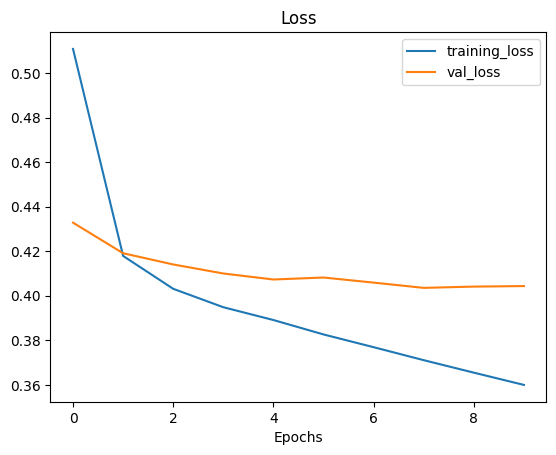

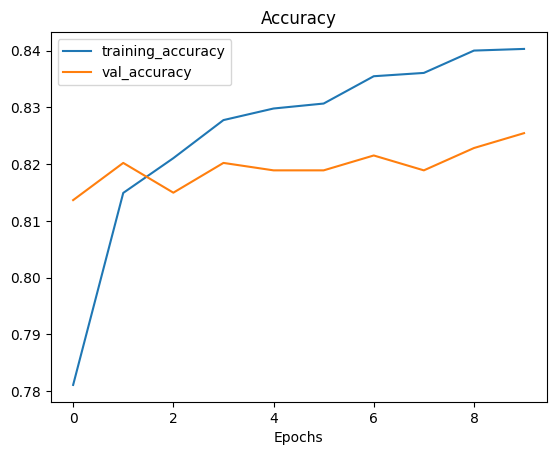

In [97]:
plot_loss_curves(history_6)

## Model 7: TF Hub 10% of training data

In [98]:
# Create subsets of 10% of the training data
train_10_percent = train_df_shuffled[['text', 'target']].sample(frac=0.1, random_state=42)
len(train_10_percent)

761

In [99]:
train_sentences_10_percent = train_10_percent['text'].to_list()
train_labels_10_percent = train_10_percent['target'].to_list()
len(train_sentences_10_percent), len(train_labels_10_percent)

(761, 761)

In [100]:
# Check the nubmer of targets in our subset of data
train_10_percent['target'].value_counts()

0    413
1    348
Name: target, dtype: int64

In [101]:
train_df_shuffled['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [106]:
embed = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                       input_shape=[],
                       dtype=tf.string)

model_7 = tf.keras.Sequential([
    embed,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_7.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 512)               256797824 
                                                                 
 dense_15 (Dense)            (None, 64)                32832     
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [103]:
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [104]:
history_7 = model_7.fit(train_sentences_10_percent,
                        train_labels_10_percent,
                        epochs=5,
                        validation_data=(val_sentences, val_labels))

Epoch 1/5
24/24 [==============================] - 7s 97ms/step - loss: 0.6697 - accuracy: 0.6912 - val_loss: 0.6369 - val_accuracy: 0.7743
Epoch 2/5
24/24 [==============================] - 1s 50ms/step - loss: 0.5987 - accuracy: 0.7845 - val_loss: 0.5695 - val_accuracy: 0.7717
Epoch 3/5
24/24 [==============================] - 1s 60ms/step - loss: 0.5252 - accuracy: 0.7976 - val_loss: 0.5123 - val_accuracy: 0.7808
Epoch 4/5
24/24 [==============================] - 1s 48ms/step - loss: 0.4687 - accuracy: 0.8095 - val_loss: 0.4791 - val_accuracy: 0.7861
Epoch 5/5
24/24 [==============================] - 1s 49ms/step - loss: 0.4326 - accuracy: 0.8173 - val_loss: 0.4621 - val_accuracy: 0.7992
